# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import cross_val_score
from sklearn.utils.multiclass import unique_labels

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [3]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [5]:
boston_model = LinearRegression()

In [6]:
boston_model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_train_pred = boston_model.predict(X_train)

y_test_pred = boston_model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [8]:
# R-squared for Train
round(r2_score(y_train, y_train_pred),4)

0.7439

In [9]:
# R-squared for Test
round(r2_score(y_test, y_test_pred),4)

0.7197

## 4. Calculate and print mean squared error for both the training and the testing set.

In [10]:
# Mean Squared error for Train
mean_squared_error(y_train, y_train_pred)

22.049727931820946

In [11]:
# R-squared for Test
mean_squared_error(y_test, y_test_pred)

21.779014623634914

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [12]:
# Mean Squared error for Train
mean_absolute_error(y_train, y_train_pred)

3.312504566323102

In [13]:
# R-squared for Test
mean_absolute_error(y_test, y_test_pred)

3.1966334208621823

## Classification Model Evaluation

In [14]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [15]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [17]:
iris_model = LogisticRegression(max_iter=10000)

In [18]:
iris_model.fit(X_train, y_train.values.ravel())
# warning may appear,
# use .values.ravel https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected

LogisticRegression(max_iter=10000)

In [19]:
y_pred_train = iris_model.predict(X_train)
y_pred_test = iris_model.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [20]:
accuracy_score(y_train, y_pred_train)

0.975

In [21]:
accuracy_score(y_test, y_pred_test)

1.0

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [22]:
balanced_accuracy_score(y_train, y_pred_train)

0.9736842105263158

In [23]:
balanced_accuracy_score(y_test, y_pred_test)

1.0

## 10. Calculate and print the precision score for both the training and the testing set.

In [24]:
precision_score(y_train, y_pred_train, average='weighted')

0.9767441860465117

In [25]:
precision_score(y_test, y_pred_test, average='weighted')

1.0

## 11. Calculate and print the recall score for both the training and the testing set.

In [26]:
recall_score(y_train, y_pred_train, average='weighted')

0.975

In [27]:
recall_score(y_test, y_pred_test, average='weighted')

1.0

## 12. Calculate and print the F1 score for both the training and the testing set.

In [28]:
f1_score(y_train, y_pred_train, average='weighted')

0.9749381085987785

In [29]:
f1_score(y_test, y_pred_test, average='weighted')

1.0

## 13. Generate confusion matrices for both the training and the testing set.

In [30]:
# train
confusion_matrix(y_train, y_pred_train)

array([[42,  0,  0],
       [ 0, 35,  3],
       [ 0,  0, 40]])

In [31]:
# test
confusion_matrix(y_test, y_pred_test)

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]])

In [32]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
 

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),

           #LABELS 
           
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [33]:
iris = load_iris()

In [34]:
class_names = iris.target_names

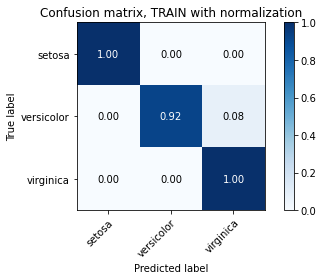

In [35]:
plot_confusion_matrix(y_train, y_pred_train, classes=class_names, normalize=True,
                      title='Confusion matrix, TRAIN with normalization')

plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=65)

In [38]:
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=5, random_state=65)

In [39]:
clf.feature_importances_

array([0.08104314, 0.0162928 , 0.42857409, 0.47408997])

In [40]:
y_pred_train_rf = clf.predict(X_train)

In [41]:
y_pred_test_rf = clf.predict(X_test)

In [42]:
accuracy_score(y_train, y_pred_train_rf)

1.0

In [43]:
accuracy_score(y_test, y_pred_test_rf)

0.9333333333333333

In [44]:
f1_score(y_train, y_pred_train_rf, average='weighted')

1.0

In [45]:
f1_score(y_test, y_pred_test_rf, average='weighted')

0.931547619047619

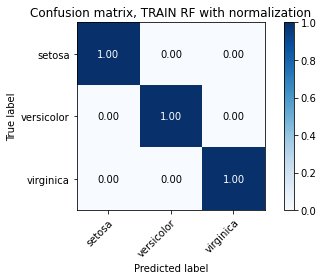

In [46]:
plot_confusion_matrix(y_train, y_pred_train_rf, classes=class_names, normalize=True,
                      title='Confusion matrix, TRAIN RF with normalization')

plt.show()

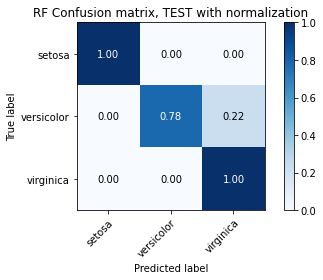

In [47]:
plot_confusion_matrix(y_test, y_pred_test_rf, classes=class_names, normalize=True,
                      title='RF Confusion matrix, TEST with normalization')

plt.show()